In [1]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


drive.mount('/content/drive')

import zipfile
zip_path = '/content/drive/MyDrive/Data_Snakes.zip'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content')

print("Dataset extracted successfully!")

Mounted at /content/drive
Dataset extracted successfully!


In [2]:
# Normalization & Resizing Confirmation

dataset_path = "/content/Data_Snakes/train_all"
test_path = "/content/Data_Snakes/test"

# Training generator (rescale and augmentation)
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=False
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Test generator (rescale only)
test_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

images_batch, labels_batch = next(train_gen)

print(f"Batch Shape (Images): {images_batch.shape}")
print(f"Data Type (Images): {images_batch.dtype}")
print(f"Min Pixel Value: {images_batch.min():.3f}")
print(f"Max Pixel Value: {images_batch.max():.3f}")

print(f"Label of first image: {labels_batch[0]}")

Found 6625 images belonging to 2 classes.
Found 1656 images belonging to 2 classes.
Found 921 images belonging to 2 classes.
Batch Shape (Images): (32, 150, 150, 3)
Data Type (Images): float32
Min Pixel Value: 0.000
Max Pixel Value: 1.000
Label of first image: 0.0


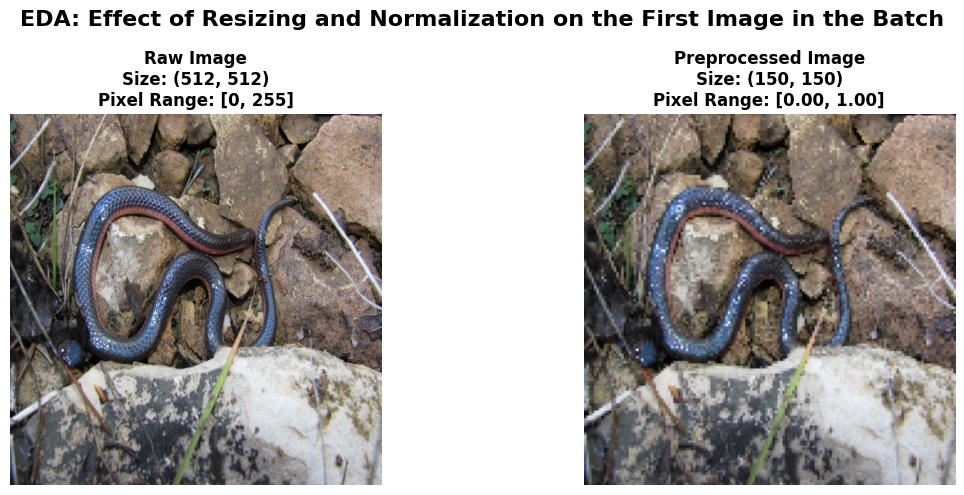

In [3]:
# EDA
from tensorflow.keras.preprocessing import image

first_file_path = train_gen.filepaths[0]
raw_img = image.load_img(first_file_path)
raw_img_array = image.img_to_array(raw_img)

preprocessed_img = images_batch[0]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(raw_img_array.astype('uint8'))
axes[0].set_title(f'Raw Image\nSize: {raw_img_array.shape[:-1]}\nPixel Range: [0, 255]', fontweight='bold')
axes[0].axis('off')

axes[1].imshow(preprocessed_img)
axes[1].set_title(f'Preprocessed Image\nSize: {preprocessed_img.shape[:-1]}\nPixel Range: [{preprocessed_img.min():.2f}, {preprocessed_img.max():.2f}]', fontweight='bold')
axes[1].axis('off')

plt.suptitle('EDA: Effect of Resizing and Normalization on the First Image in the Batch', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()